In [26]:
####################################################################
###    This is the PYTHON version of program 4.2 from page 123 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is a N strain SIR disease model, where the strains are      #
### arranged in a circle and each strain offers partial immunity   #
### (in terms of reduced transmission) to its neighbours.		   #
####################################################################


In [27]:
import scipy.integrate as spi
import numpy as np
import pylab as pl


*r is the rate at which humans are bitten.

*gamma[i] is the recovery rate for host species i.

*nu[i] is the birth rate for host species i.

*mu[i] is the per capita death rate for host species i.

*Tij is the transmission probability (following a bite) to species i from species j.

*X0(i) is the initial number of individuals of species i that are susceptible

*Y0(i) is the initial number of individuals of species i that are infectious

In [28]:
r=0.5/1e3;
beta=np.array([[0, 0.5], [0.8, 0]]);
gamma=np.array([0.033, 0]);
mu=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
X0=np.array([1e3, 1e4]);
Y0=np.array([1, 1]);
ND=MaxTime=1000.0;
TS=1.0

INPUT=np.hstack((X0,Y0))

In [29]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP   
	Y[0] = nu[0] - V[0] * r * (beta[0][1]*V[3]) - mu[0] * V[0]
	Y[1] = nu[1] - V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[1]
	Y[2] = V[0] * r * (beta[0][1]*V[3]) - gamma[0] * V[2] - mu[0] * V[2]
	Y[3] = V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[3]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print(RES)

[[1.00000000e+03 1.00000000e+04 1.00000000e+00 1.00000000e+00]
 [9.99214885e+02 1.00073158e+04 1.74289345e+00 5.66422820e+00]
 [9.96778515e+02 1.00081761e+04 4.08920043e+00 1.51876279e+01]
 ...
 [4.63785772e+00 1.00443791e+04 1.65133388e+00 4.65300112e+01]
 [4.63865913e+00 1.00443981e+04 1.65070297e+00 4.65109691e+01]
 [4.63947307e+00 1.00444170e+04 1.65008021e+00 4.64921296e+01]]


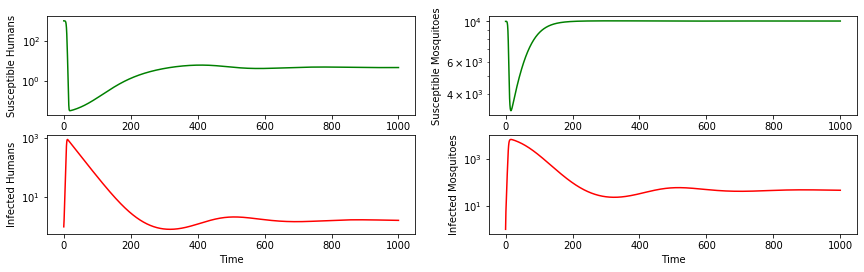

In [30]:
#Ploting

pl.subplot(221)
pl.semilogy(RES[:,0], 'g', label='SH')
pl.xlabel('Time')
pl.ylabel('Susceptible Humans')


pl.subplot(222)
pl.semilogy(RES[:,1], 'g', label='SM')
pl.xlabel('Time')
pl.ylabel('Susceptible Mosquitoes')

pl.subplot(223)
pl.semilogy(RES[:,2], 'r', label='IH')
pl.xlabel('Time')
pl.ylabel('Infected Humans')
pl.subplots_adjust(right=2)

pl.subplot(224)
pl.semilogy(RES[:,3], 'r', label='IM')
pl.xlabel('Time')
pl.ylabel('Infected Mosquitoes')

pl.show()